<a href="https://colab.research.google.com/github/modeloacessibilidade/ProjetoIntegrador/blob/master/E00_V00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJETO INTEGRADOR - GRUPO 03**

***Arana, Lucas, Patrícia, Tiago, Victor B. & Victor W.***


---



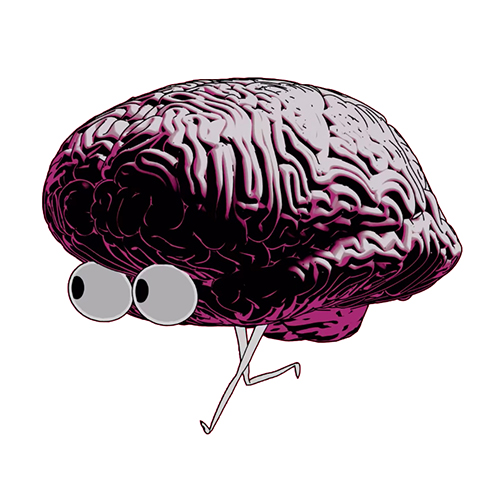

**Documentação datasets Yelp:**\
https://www.yelp.com/dataset/documentation/faq

**Resumo da proposta:**\
Ver o quanto a acessibilidade impacta na avaliação e fluxo de um estabelecimento

**Objetivo:**\
Analisar se atributos de acessibilidade impactam em um maior número de reviews, dicas e nas notas (estrelas) de avalição de um estabelecimento da categoria alimentícia (restaurantes, cafés, etc)

**Pressupostos:**\
a) O percentual de clientes dos estabelecimentos que avaliam no Yelp é a mesma; portanto, dobro de reviews = dobro de clientes

**Leitura dos datasets**

In [ ]:
# Montando Drive no Colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import json
import os
import re
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Importando arquivos json do Drive
os.chdir("/content/drive/My Drive/Yelp_datasets")
os.listdir()

['yelp_academic_dataset_business.json',
 'yelp_academic_dataset_checkin.json',
 'yelp_academic_dataset_review.json',
 'yelp_academic_dataset_tip.json',
 'yelp_academic_dataset_user.json',
 'categories.json']

['yelp_academic_dataset_business.json',
 'yelp_academic_dataset_checkin.json',
 'yelp_academic_dataset_review.json',
 'yelp_academic_dataset_tip.json',
 'yelp_academic_dataset_user.json',
 'categories.json']

## DATASETS

**Dataset 1/6 - "CATEGORIES"**

In [ ]:
# Criando DataFrame do dataset "CATEGORIES"
with open('categories.json') as categories00:
    data= categories00.read()
objeto = json.loads(data)
df_categories = pd.DataFrame(objeto)

In [ ]:
df_categories

,alias,title,parents,country_whitelist,country_blacklist
0,3dprinting,3D Printing,[localservices],NaN,NaN
1,abruzzese,Abruzzese,[italian],[IT],NaN
2,absinthebars,Absinthe Bars,[bars],[CZ],NaN
3,acaibowls,Acai Bowls,[food],NaN,"[AR, TR, IT, PL, MX, CL]"
4,accessories,Accessories,[fashion],NaN,NaN
...,...,...,...,...,...
1560,yugoslav,Yugoslav,[restaurants],"[SE, PT, FR, IT, BE, AU]",NaN
1561,zapiekanka,Zapiekanka,[food],[PL],NaN
1562,zipline,Ziplining,[active],NaN,NaN
1563,zoos,Zoos,[active],NaN,NaN


In [ ]:
df_categories.shape

(1565, 5)

In [ ]:
df_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   alias              1565 non-null   object
 1   title              1565 non-null   object
 2   parents            1565 non-null   object
 3   country_whitelist  531 non-null    object
 4   country_blacklist  352 non-null    object
dtypes: object(5)
memory usage: 61.3+ KB


In [ ]:
# Fazendo limpeza dos dados, extraindo somente as informacoes texto da coluna parents(eliminando o colchete)
parents = df_categories.parents.apply(pd.Series)
parents

,0,1,2
0,localservices,NaN,NaN
1,italian,NaN,NaN
2,bars,NaN,NaN
3,food,NaN,NaN
4,fashion,NaN,NaN
...,...,...,...
1560,restaurants,NaN,NaN
1561,food,NaN,NaN
1562,active,NaN,NaN
1563,active,NaN,NaN


In [ ]:
parents.columns = ['Parents', 'one', 'two']

In [ ]:
parents = parents.drop(columns=['one','two'])
parents

,Parents
0,localservices
1,italian
2,bars
3,food
4,fashion
...,...
1560,restaurants
1561,food
1562,active
1563,active


In [ ]:
# Fazendo a união da tabela parents a tabela mãe df_categories
df_categories = pd.concat([df_categories, parents], axis = 1).drop(columns=['parents'])
df_categories.head(5)

,alias,title,country_whitelist,country_blacklist,Parents
0,3dprinting,3D Printing,NaN,NaN,localservices
1,abruzzese,Abruzzese,[IT],NaN,italian
2,absinthebars,Absinthe Bars,[CZ],NaN,bars
3,acaibowls,Acai Bowls,NaN,"[AR, TR, IT, PL, MX, CL]",food
4,accessories,Accessories,NaN,NaN,fashion


In [ ]:
#Colocando a coluna Parents pela sua ordem de origem
df_categories = df_categories[['alias', 'title', 'Parents', 'country_whitelist', 'country_blacklist']]
df_categories


,alias,title,Parents,country_whitelist,country_blacklist
0,3dprinting,3D Printing,localservices,NaN,NaN
1,abruzzese,Abruzzese,italian,[IT],NaN
2,absinthebars,Absinthe Bars,bars,[CZ],NaN
3,acaibowls,Acai Bowls,food,NaN,"[AR, TR, IT, PL, MX, CL]"
4,accessories,Accessories,fashion,NaN,NaN
...,...,...,...,...,...
1560,yugoslav,Yugoslav,restaurants,"[SE, PT, FR, IT, BE, AU]",NaN
1561,zapiekanka,Zapiekanka,food,[PL],NaN
1562,zipline,Ziplining,active,NaN,NaN
1563,zoos,Zoos,active,NaN,NaN


In [ ]:
#Analisando informações somente de food
food = df_categories.groupby('Parents').get_group('food')
food

,alias,title,Parents,country_whitelist,country_blacklist
3,acaibowls,Acai Bowls,food,NaN,"[AR, TR, IT, PL, MX, CL]"
107,backshop,Backshop,food,"[AT, DE, CH]",NaN
110,bagels,Bagels,food,NaN,"[ES, AU]"
113,bakeries,Bakeries,food,NaN,NaN
138,beer_and_wine,"Beer, Wine & Spirits",food,NaN,NaN
...,...,...,...,...,...
1424,torshi,Torshi,food,[TR],NaN
1425,tortillas,Tortillas,food,[MX],NaN
1522,waterstores,Water Stores,food,"[CA, MX, US, BR]",NaN
1545,wineries,Wineries,food,NaN,[FI]


In [ ]:
# Os tipos de food
print(len(food.title))
food.title.values

68


array(['Acai Bowls', 'Backshop', 'Bagels', 'Bakeries',
       'Beer, Wine & Spirits', 'Bento', 'Beverage Store', 'Breweries',
       'Bubble Tea', 'Butcher', 'Patisserie/Cake Shop', 'Chimney Cakes',
       'Churros', 'Cideries', 'Coffee & Tea', 'Coffee Roasteries',
       'Coffee & Tea Supplies', 'Convenience Stores', 'CSA', 'Cupcakes',
       'Custom Cakes', 'Delicatessen', 'Desserts', 'Distilleries',
       'Do-It-Yourself Food', 'Donairs', 'Donuts', 'Empanadas',
       'Ethical Grocery', 'Farmers Market', 'Fishmonger',
       'Food Delivery Services', 'Food Trucks', 'Friterie', 'Gelato',
       'Mulled Wine', 'Specialty Food', 'Grocery', 'Hawker Centre',
       'Honey', 'Ice Cream & Frozen Yogurt', 'Imported Food',
       'Internet Cafes', 'International Grocery', 'Japanese Sweets',
       'Juice Bars & Smoothies', 'Kiosk', 'Kombucha', 'Meaderies',
       'Milkshake Bars', 'Nasi Lemak', 'Organic Stores', 'Panzerotti',
       'Piadina', 'Poke', 'Pretzels', 'Salumerie', 'Shaved Ice',


**Dataset 2/6 - "BUSINESS"**\
*Contains business data including location data, attributes, and categories.*

In [ ]:
# Criando DataFrame do dataset "BUSINESS"
business = []
with open('yelp_academic_dataset_business.json') as business00:
    for i, line in enumerate(business00):
        business.append(json.loads(line))
df_business = pd.DataFrame(business)

In [ ]:
# "business_id": // string, 22 character unique string business id
# "name": // string, the business's name
# "address": // string, the full address of the business
# "city": // string, the city
# "state": // string, 2 character state code, if applicable
# "postal code": // string, the postal code
# "latitude": // float, latitude
# "longitude": // float, longitude
# "stars": // float, star rating, rounded to half-stars
# "review_count": // integer, number of reviews
# "is_open": // integer, 0 or 1 for closed or open, respectively
# "attributes": // object, business attributes to values. note: some attribute values might be objects
# "categories": // an array of strings of business categories
# "hours": // an object of key day to value hours, hours are using a 24hr clock

In [ ]:
# Exibindo nosso DF "BUSINESS"
display(df_business.head())

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [ ]:
# Exibindo formato do DF "BUSINESS"
df_business.shape

(209393, 14)

In [ ]:
# Exibindo informações do DF "BUSINESS"
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   209393 non-null  object 
 1   name          209393 non-null  object 
 2   address       209393 non-null  object 
 3   city          209393 non-null  object 
 4   state         209393 non-null  object 
 5   postal_code   209393 non-null  object 
 6   latitude      209393 non-null  float64
 7   longitude     209393 non-null  float64
 8   stars         209393 non-null  float64
 9   review_count  209393 non-null  int64  
 10  is_open       209393 non-null  int64  
 11  attributes    180348 non-null  object 
 12  categories    208869 non-null  object 
 13  hours         164550 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 22.4+ MB


In [ ]:
# Descrevendo DF "BUSINESS"
round(df_business.describe(),2)

,latitude,longitude,stars,review_count,is_open
count,209393.00,209393.00,209393.00,209393.00,209393.00
mean,38.58,-97.39,3.54,36.94,0.81
std,4.94,16.72,1.02,123.34,0.39
min,21.50,-158.03,1.00,3.00,0.00
25%,33.64,-112.27,3.00,4.00,1.00
50%,36.15,-111.74,3.50,9.00,1.00
75%,43.61,-79.97,4.50,27.00,1.00
max,51.30,-72.81,5.00,10129.00,1.00


In [ ]:
# Analisando a coluna 'categories' para saber quais tipos de categorias estão contidos na base.
df_business['categories'].values

array(['Active Life, Gun/Rifle Ranges, Guns & Ammo, Shopping',
       'Health & Medical, Fitness & Instruction, Yoga, Active Life, Pilates',
       'Pets, Pet Services, Pet Groomers', ...,
       'American (New), Food, Burgers, Restaurants, Fast Food',
       'Pet Services, Pet Training, Pets',
       'Tax Services, Professional Services, Accountants, Financial Services'],
      dtype=object)

In [ ]:
df_business.groupby('categories').sum()

,latitude,longitude,stars,review_count,is_open
categories,,,,,
"3D Printing, Computers, Local Services, Electronics, Shopping, Printing Services",33.378595,-111.863904,4.0,4,1
"3D Printing, Graphic Design, Professional Services, Printing Services, Local Services",43.671625,-79.382984,1.0,3,1
"3D Printing, Local Services",36.056378,-115.265978,5.0,3,1
"3D Printing, Local Services, Coffee & Tea, Engraving, Food",43.660607,-79.432474,5.0,4,1
"3D Printing, Printing Services, Local Services",43.653226,-79.383184,1.5,3,1
...,...,...,...,...,...
"Zoos, Arts & Entertainment, Ranches, Farms, Active Life",33.547709,-112.439158,1.0,8,1
"Zoos, Fitness & Instruction, Yoga, Active Life, Petting Zoos",33.241135,-111.725694,4.5,46,1
"Zoos, Local Flavor, Active Life",36.191991,-115.189949,2.5,21,0


In [ ]:
#DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=<object object>, observed=False, dropna=True)

In [ ]:
# Desmembrando a coluna 'attributes', transformando em uma 'series'
attributes = df_business.attributes.apply(pd.Series)
attributes.tail(6)

,BusinessAcceptsCreditCards,BikeParking,GoodForKids,BusinessParking,ByAppointmentOnly,RestaurantsPriceRange2,DogsAllowed,WiFi,RestaurantsAttire,RestaurantsTakeOut,NoiseLevel,RestaurantsReservations,RestaurantsGoodForGroups,HasTV,Alcohol,RestaurantsDelivery,OutdoorSeating,Caters,WheelchairAccessible,AcceptsInsurance,RestaurantsTableService,Ambience,GoodForMeal,HappyHour,BusinessAcceptsBitcoin,BYOB,Corkage,GoodForDancing,CoatCheck,BestNights,Music,Smoking,DietaryRestrictions,DriveThru,HairSpecializesIn,BYOBCorkage,AgesAllowed,RestaurantsCounterService,Open24Hours
209387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209388,NaN,NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,2,NaN,'free',u'casual',True,u'quiet',True,True,False,u'beer_and_wine',False,False,NaN,NaN,NaN,NaN,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209389,True,NaN,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209390,True,True,True,"{'garage': False, 'street': False, 'validated'...",NaN,2,NaN,u'no',u'casual',True,u'average',False,True,False,u'none',False,True,False,NaN,NaN,NaN,"{'romantic': False, 'intimate': False, 'touris...","{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
209391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
attributes.shape

(209393, 39)

In [ ]:
# Verificando quantidade de NaN na variável attributes
attributes.isnull().sum()

BusinessAcceptsCreditCards     87156
BikeParking                   119628
GoodForKids                   140858
BusinessParking                94178
ByAppointmentOnly             148594
RestaurantsPriceRange2         98105
DogsAllowed                   191854
WiFi                          144062
RestaurantsAttire             159826
RestaurantsTakeOut            143092
NoiseLevel                    162834
RestaurantsReservations       154032
RestaurantsGoodForGroups      153231
HasTV                         156005
Alcohol                       158555
RestaurantsDelivery           152714
OutdoorSeating                150952
Caters                        165424
WheelchairAccessible          180758
AcceptsInsurance              200733
RestaurantsTableService       188608
Ambience                      155587
GoodForMeal                   174211
HappyHour                     194069
BusinessAcceptsBitcoin        192861
BYOB                          208653
Corkage                       208303
G

In [ ]:
attributes.notnull().sum()

BusinessAcceptsCreditCards    122237
BikeParking                    89765
GoodForKids                    68535
BusinessParking               115215
ByAppointmentOnly              60799
RestaurantsPriceRange2        111288
DogsAllowed                    17539
WiFi                           65331
RestaurantsAttire              49567
RestaurantsTakeOut             66301
NoiseLevel                     46559
RestaurantsReservations        55361
RestaurantsGoodForGroups       56162
HasTV                          53388
Alcohol                        50838
RestaurantsDelivery            56679
OutdoorSeating                 58441
Caters                         43969
WheelchairAccessible           28635
AcceptsInsurance                8660
RestaurantsTableService        20785
Ambience                       53806
GoodForMeal                    35182
HappyHour                      15324
BusinessAcceptsBitcoin         16532
BYOB                             740
Corkage                         1090
G

In [ ]:
#Analisando   coluna RestaurantsPriceRange2 da variavel attributes.

attributes.RestaurantsPriceRange2.value_counts()

2       62825
1       35405
3       10651
4        2296
None      111
Name: RestaurantsPriceRange2, dtype: int64

**Dataset 3/6 - "CHECK-IN"**\
*Checkins on a business.*

In [ ]:
# Criando DataFrame do dataset "CHECK-IN"
checkin = []
with open('yelp_academic_dataset_checkin.json') as checkin00:
    for i, line in enumerate(checkin00):
        checkin.append(json.loads(line))
df_checkin = pd.DataFrame(checkin)

In [ ]:
# "business_id": // string, 22 character business id, maps to business in business.json
# "date": // string which is a comma-separated list of timestamps for each checkin, each with format YYYY-MM-DD HH:MM:SS

In [ ]:
# Exibindo nosso DF "CHECK-IN"
display(df_checkin.head())

,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,--8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30
4,--9QQLMTbFzLJ_oT-ON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."


In [ ]:
# Exibindo formato do DF "CHECK-IN"
df_checkin.shape

(175187, 2)

In [ ]:
# Exibindo informações do DF "CHECK-IN"
df_checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175187 entries, 0 to 175186
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  175187 non-null  object
 1   date         175187 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


**Dataset 4/6 - "REVIEW"**\
*Contains full review text data including the user_id that wrote the review and the business_id the review is written for.*

In [ ]:
# Criando DataFrame do dataset "REVIEW"
review = []
threshold = 1e6 #1 milhão de reviews
with open('yelp_academic_dataset_review.json') as review00:
    for i, line in enumerate(review00):
        review.append(json.loads(line))
        if i + 1 >= threshold:
            break
df_review = pd.DataFrame(review)

In [ ]:
# "review_id": // string, 22 character unique review id
# "user_id": // string, 22 character unique user id, maps to the user in user.json
# "business_id": // string, 22 character business id, maps to business in business.json
# "stars": // integer, star rating
# "date": // string, date formatted YYYY-MM-DD
# "text": // string, the review itself
# "useful": // integer, number of useful votes received
# "funny": // integer, number of funny votes received
# "cool": // integer, number of cool votes received

In [ ]:
# Exibindo nosso DF "REVIEW"
display(df_review.head())

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


In [ ]:
# Exibindo formato do DF "REVIEW"
df_review.shape

(1000000, 9)

In [ ]:
# Exibindo informações do DF "REVIEW"
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   review_id    1000000 non-null  object 
 1   user_id      1000000 non-null  object 
 2   business_id  1000000 non-null  object 
 3   stars        1000000 non-null  float64
 4   useful       1000000 non-null  int64  
 5   funny        1000000 non-null  int64  
 6   cool         1000000 non-null  int64  
 7   text         1000000 non-null  object 
 8   date         1000000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 68.7+ MB


In [ ]:
# Descrevendo DF "REVIEW"
round(df_review.describe(),2)

,stars,useful,funny,cool
count,1000000.00,1000000.00,1000000.00,1000000.00
mean,3.72,1.27,0.43,0.54
std,1.48,3.24,1.79,2.29
min,1.00,0.00,0.00,0.00
25%,3.00,0.00,0.00,0.00
50%,4.00,0.00,0.00,0.00
75%,5.00,1.00,0.00,0.00
max,5.00,354.00,171.00,199.00


**Dataset 5/6 - "TIP"**\
*Tips written by a user on a business. Tips are shorter than reviews and tend to convey quick suggestions.*

In [ ]:
# Criando DataFrame do dataset "TIP"
tip = []
with open('yelp_academic_dataset_tip.json') as tip00:
    for i, line in enumerate(tip00):
        tip.append(json.loads(line))
df_tip = pd.DataFrame(tip)

In [ ]:
# "text": // string, text of the tip
# "date": // string, when the tip was written, formatted like YYYY-MM-DD
# "compliment_count": // integer, how many compliments it has
# "business_id": // string, 22 character business id, maps to business in business.json
# "user_id": // string, 22 character unique user id, maps to the user in user.json

In [ ]:
# Exibindo nosso DF "TIP"
display(df_tip.head())

,user_id,business_id,text,date,compliment_count
0,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,Here for a quick mtg,2013-11-26 18:20:08,0
1,uEvusDwoSymbJJ0auR3muQ,Ch3HkwQYv1YKw_FO06vBWA,Cucumber strawberry refresher,2014-06-15 22:26:45,0
2,AY-laIws3S7YXNl_f_D6rQ,rDoT-MgxGRiYqCmi0bG10g,Very nice good service good food,2016-07-18 22:03:42,0
3,Ue_7yUlkEbX4AhnYdUfL7g,OHXnDV01gLokiX1ELaQufA,It's a small place. The staff is friendly.,2014-06-06 01:10:34,0
4,LltbT_fUMqZ-ZJP-vJ84IQ,GMrwDXRlAZU2zj5nH6l4vQ,"8 sandwiches, $24 total...what a bargain!!! An...",2011-04-08 18:12:01,0


In [ ]:
# Exibindo formato do DF "TIP"
df_tip.shape

(1320761, 5)

In [ ]:
# Exibindo informações do DF "TIP"
df_tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320761 entries, 0 to 1320760
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   user_id           1320761 non-null  object
 1   business_id       1320761 non-null  object
 2   text              1320761 non-null  object
 3   date              1320761 non-null  object
 4   compliment_count  1320761 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 50.4+ MB


In [ ]:
# Descrevendo DF "TIP"
round(df_tip.describe(),2)

,compliment_count
count,1320761.00
mean,0.02
std,0.14
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,15.00


**Dataset 6/6 - "USER"**\
*User data including the user's friend mapping and all the metadata associated with the user.*

In [ ]:
# Criando DataFrame do dataset "USER"
user = []
threshold = 1e6 #1 milhão de usuários
with open('yelp_academic_dataset_user.json') as user00:
    for i, line in enumerate(user00):
        user.append(json.loads(line))
        if i + 1 >= threshold:
            break
df_user = pd.DataFrame(user)

In [ ]:
# "user_id": // string, 22 character unique user id, maps to the user in user.json
# "name": // string, the user's first name
# "review_count": // integer, the number of reviews they've written
# "yelping_since": // string, when the user joined Yelp, formatted like YYYY-MM-DD
# "friends": // array of strings, an array of the user's friend as user_ids
# "useful": // integer, number of useful votes sent by the user
# "funny": // integer, number of funny votes sent by the user
# "cool": // integer, number of cool votes sent by the user
# "fans": // integer, number of fans the user has
# "elite": // array of integers, the years the user was elite
# "average_stars": // float, average rating of all reviews
# "compliment_hot": // integer, number of hot compliments received by the user
# "compliment_more": // integer, number of more compliments received by the user
# "compliment_profile": // integer, number of profile compliments received by the user
# "compliment_cute": // integer, number of cute compliments received by the user
# "compliment_list": // integer, number of list compliments received by the user
# "compliment_note": // integer, number of note compliments received by the user
# "compliment_plain": // integer, number of plain compliments received by the user
# "compliment_cool": // integer, number of cool compliments received by the user
# "compliment_funny": // integer, number of funny compliments received by the user
# "compliment_writer": // integer, number of writer compliments received by the user
# "compliment_photos": // integer, number of photo compliments received by the user

In [ ]:
# Exibindo nosso DF "USER"
display(df_user.head())

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",14,3.57,3,2,1,0,1,11,15,22,22,10,0
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,790,316,400,"2008,2009,2010,2011,2012,2013","ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",27,3.84,36,4,5,2,1,33,37,63,63,21,5
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,151,125,103,2010,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",5,3.44,9,6,0,1,0,3,7,17,17,4,1
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,233,160,84,2009,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",6,3.08,2,1,0,0,0,7,14,7,7,2,0
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,1265,400,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018","3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",78,4.37,8,9,2,1,1,22,28,31,31,19,31


In [ ]:
# Exibindo formato do DF "USER"
df_user.shape

(1000000, 22)

In [ ]:
# Exibindo informações do DF "USER"
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   user_id             1000000 non-null  object 
 1   name                1000000 non-null  object 
 2   review_count        1000000 non-null  int64  
 3   yelping_since       1000000 non-null  object 
 4   useful              1000000 non-null  int64  
 5   funny               1000000 non-null  int64  
 6   cool                1000000 non-null  int64  
 7   elite               1000000 non-null  object 
 8   friends             1000000 non-null  object 
 9   fans                1000000 non-null  int64  
 10  average_stars       1000000 non-null  float64
 11  compliment_hot      1000000 non-null  int64  
 12  compliment_more     1000000 non-null  int64  
 13  compliment_profile  1000000 non-null  int64  
 14  compliment_cute     1000000 non-null  int64  
 15  compliment_list 

In [ ]:
# Descrevendo DF "USER"
round(df_user.describe(),2)

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00
mean,31.13,61.74,27.57,35.49,2.22,3.68,3.26,0.47,0.30,0.25,0.11,2.20,4.66,4.64,4.64,1.74,1.79
std,100.72,698.71,486.39,608.03,22.59,1.06,90.54,11.34,14.98,8.06,5.70,79.75,127.40,109.78,109.78,40.00,97.01
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,1.00,0.00,0.00,0.00,3.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,8.00,5.00,1.00,1.00,0.00,3.86,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,21.00,19.00,4.00,5.00,1.00,4.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,14455.00,197130.00,165861.00,191359.00,11568.00,5.00,25452.00,4102.00,6711.00,2912.00,2461.00,58480.00,72370.00,40508.00,40508.00,13955.00,50823.00
